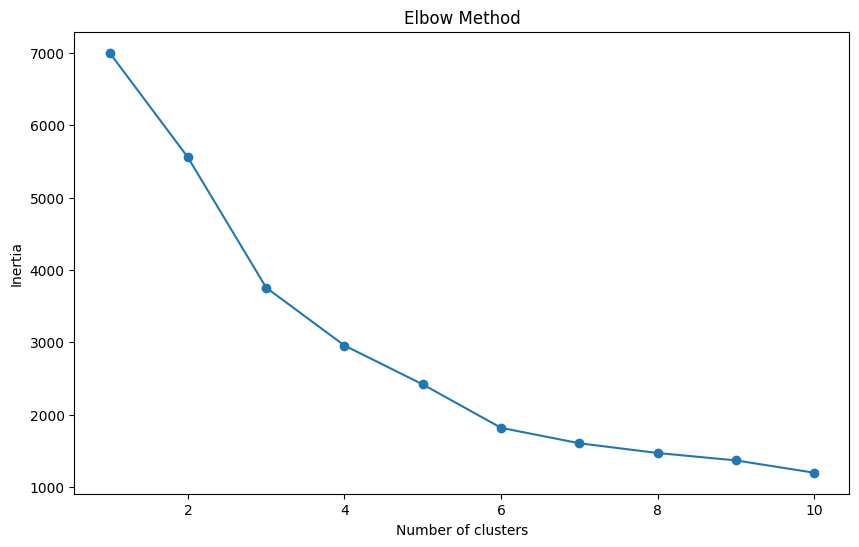

[[-6.43227381e-02 -2.57680802e-02 -6.44484597e-02 -3.64172013e-02
   3.80880965e-03 -3.82414261e-02 -2.83737080e-03]
 [-1.71844283e-01 -1.89451345e-01 -1.66835728e-01  1.85019576e+01
  -5.34616633e-01  1.92511317e+01  2.84046466e+00]
 [ 1.28432335e+01  5.19332127e+00  1.28661984e+01 -1.68326848e-01
  -5.42582943e-01 -1.05705437e-01 -5.72684024e-01]]


In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load Dataset
df = pd.read_csv('./data/profiles_dataset.csv')  # Adjust the path to your dataset

# Step 3: Data Preprocessing
# Select relevant numerical features for clustering
features = df[['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate', 'followers', 'following', 'likes', 'videos_count']]
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Determining the Number of Clusters (k)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: Applying K-Means Clustering
# Choose an optimal k from the elbow graph, let's say k=3 for example
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Step 6: Analyzing the Results
# Assign clusters to the original data
df['cluster'] = kmeans.labels_

# Optionally, examine cluster centroids
print(kmeans.cluster_centers_)

# Now, you can analyze the clustered data in df


In [3]:
df[['awg_engagement_rate', 'like_engagement_rate', 'comment_engagement_rate', 'followers', 'likes', 'videos_count', 'is_verified']].describe()

,awg_engagement_rate,like_engagement_rate,comment_engagement_rate,followers,likes,videos_count
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,0.562932,0.536364,0.026569,1.130869e+05,3.371786e+06,271.942000
std,3.222055,3.159788,0.140016,6.698270e+05,3.128021e+07,464.261197
min,0.000091,0.000000,0.000000,1.000000e+00,3.000000e+00,1.000000
25%,0.012528,0.011791,0.000252,6.712500e+02,1.930000e+03,18.000000
50%,0.053558,0.049653,0.001203,5.241000e+03,3.895000e+04,88.000000
75%,0.202409,0.189987,0.006157,3.160000e+04,4.986000e+05,318.000000
max,63.375000,63.000000,2.000000,1.450000e+07,8.635000e+08,5394.000000


In [4]:
correlation_matrix = df[['awg_engagement_rate', 'like_engagement_rate', 'comment_engagement_rate', 'followers', 'likes', 'videos_count']].corr()
print(correlation_matrix)

                         awg_engagement_rate  like_engagement_rate  \
awg_engagement_rate                 1.000000              0.999228   
like_engagement_rate                0.999228              1.000000   
comment_engagement_rate             0.462146              0.426941   
followers                          -0.026549             -0.025683   
likes                              -0.017145             -0.016598   
videos_count                       -0.093431             -0.090580   

                         comment_engagement_rate  followers     likes  \
awg_engagement_rate                     0.462146  -0.026549 -0.017145   
like_engagement_rate                    0.426941  -0.025683 -0.016598   
comment_engagement_rate                 1.000000  -0.031347 -0.019964   
followers                              -0.031347   1.000000  0.917610   
likes                                  -0.019964   0.917610  1.000000   
videos_count                           -0.105908   0.245511  0.266047  

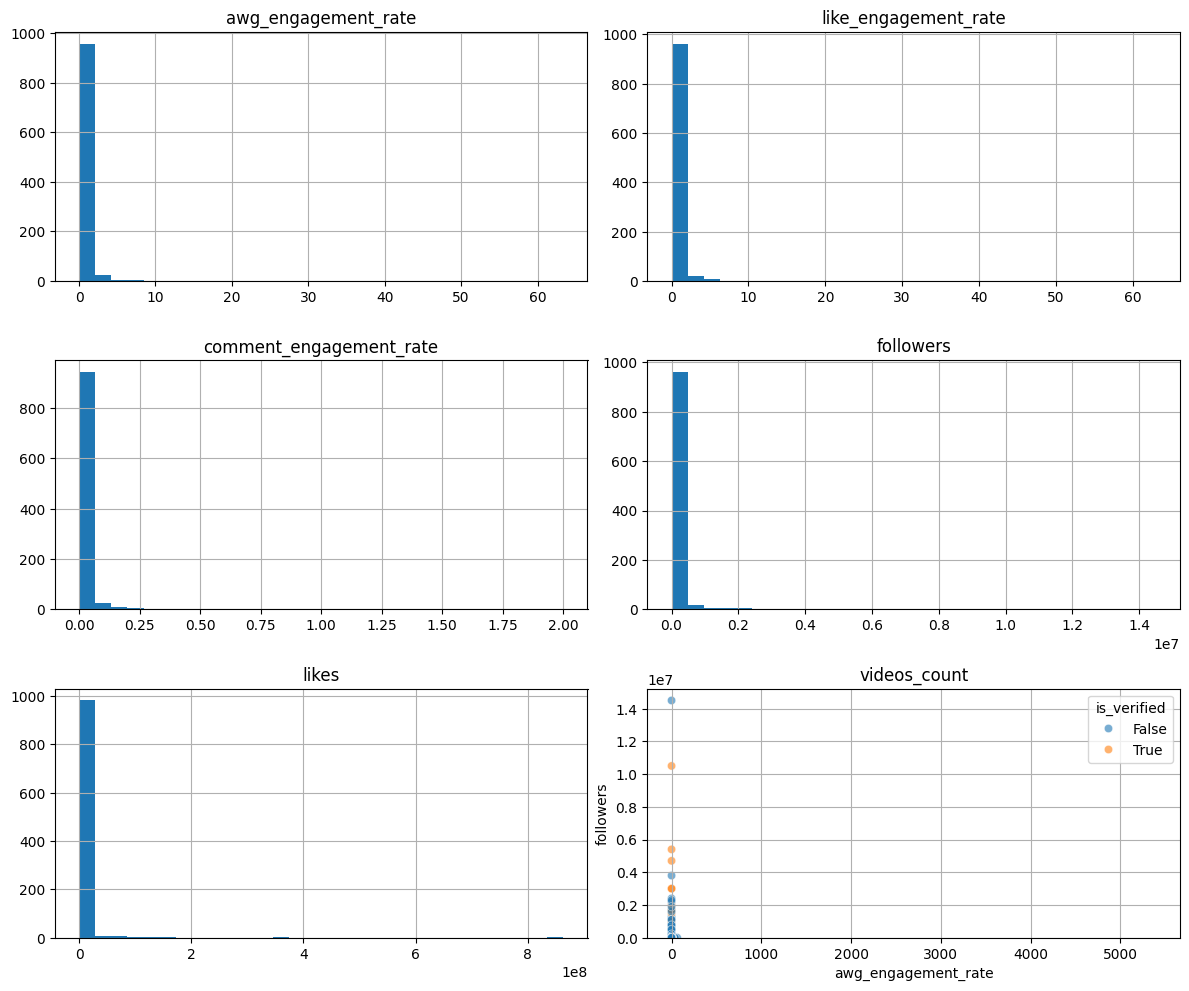

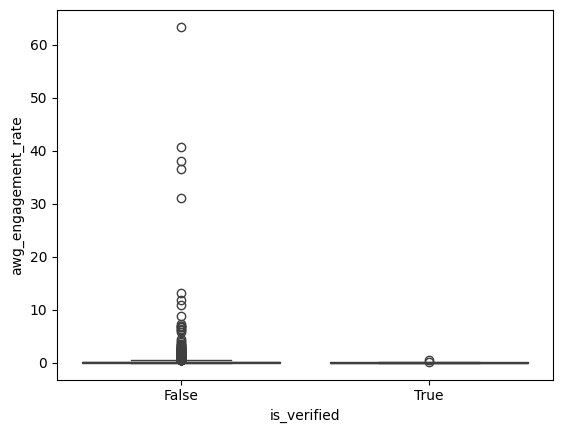

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
df[['awg_engagement_rate', 'like_engagement_rate', 'comment_engagement_rate', 'followers', 'likes', 'videos_count']].hist(bins=30, figsize=(12,10))
plt.tight_layout()

# Scatter Plot example
sns.scatterplot(x='awg_engagement_rate', y='followers', data=df, hue='is_verified', alpha=0.6)
plt.show()

# Box Plot for verified vs non-verified engagement rate
sns.boxplot(x='is_verified', y='awg_engagement_rate', data=df)
plt.show()


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv('./data/profiles_dataset.csv')  # Adjust the path to your dataset

# Step 1: Extract and Scale the Feature
features = df[['awg_engagement_rate']].values  # Extracting the feature as a 2D array
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Step 3: Interpret the Clusters
# Calculate the mean awg_engagement_rate for each cluster
cluster_means = df.groupby('cluster')['awg_engagement_rate'].mean()

print(cluster_means)

# Assuming higher engagement rates are influencers
influencer_cluster = cluster_means.idxmax()
df['user_type'] = df['cluster'].apply(lambda x: 'Influencer' if x == influencer_cluster else 'Normal User')

# Display the distribution of user types
print(df['user_type'].value_counts())

# Now, df includes a 'user_type' column indicating whether a user is an influencer or a normal user


cluster
0     0.355089
1    41.923845
Name: awg_engagement_rate, dtype: float64
user_type
Normal User    995
Influencer       5
Name: count, dtype: int64
